# Project Outline


## 0. Imports and random state

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import LabelEncoder


my_random_state = 69


## 1. Team
- Itmam Alam
- Akos Papp


## 2. Data
1. Link to dataset(s)
[https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success]()
2. Download the necessary files, describe the attributes in the notebook including classes/labels

Features
| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
| --- | --- | --- | --- | --- | --- | --- |
| Marital Status | Feature | Integer | Marital Status | 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |     | no  |
| Application mode | Feature | Integer |     | 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International) |     | no  |
| Application order | Feature | Integer |     | Application order (between 0 - first choice; and 9 last choice) |     | no  |
| Course | Feature | Integer |     | 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance) |     | no  |
| Daytime/evening attendance | Feature | Integer |     | 1 – daytime 0 - evening |     | no  |
| Previous qualification | Feature | Integer | Education Level | 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |     | no  |
| Previous qualification (grade) | Feature | Continuous |     | Grade of previous qualification (between 0 and 200) |     | no  |
| Nacionality | Feature | Integer | Nationality | 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian |     | no  |
| Mother's qualification | Feature | Integer | Education Level | 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |     | no  |
| Father's qualification | Feature | Integer | Education Level | 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |     | no  |
| Mother's occupation | Feature | Integer | Occupation | 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |     | no  |
| Father's occupation | Feature | Integer | Occupation | 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |     | no  |
| Admission grade | Feature | Continuous |     | Admission grade (between 0 and 200) |     | no  |
| Displaced | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Educational special needs | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Debtor | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Tuition fees up to date | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Gender | Feature | Integer | Gender | 1 – male 0 – female |     | no  |
| Scholarship holder | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Age at enrollment | Feature | Integer | Age | Age of studend at enrollment |     | no  |
| International | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Curricular units 1st sem (credited) | Feature | Integer |     | Number of curricular units credited in the 1st semester |     | no  |
| Curricular units 1st sem (enrolled) | Feature | Integer |     | Number of curricular units enrolled in the 1st semester |     | no  |
| Curricular units 1st sem (evaluations) | Feature | Integer |     | Number of evaluations to curricular units in the 1st semester |     | no  |
| Curricular units 1st sem (approved) | Feature | Integer |     | Number of curricular units approved in the 1st semester |     | no  |
| Curricular units 1st sem (grade) | Feature | Integer |     | Grade average in the 1st semester (between 0 and 20) |     | no  |
| Curricular units 1st sem (without evaluations) | Feature | Integer |     | Number of curricular units without evalutions in the 1st semester |     | no  |
| Curricular units 2nd sem (credited) | Feature | Integer |     | Number of curricular units credited in the 2nd semester |     | no  |
| Curricular units 2nd sem (enrolled) | Feature | Integer |     | Number of curricular units enrolled in the 2nd semester |     | no  |
| Curricular units 2nd sem (evaluations) | Feature | Integer |     | Number of evaluations to curricular units in the 2nd semester |     | no  |
| Curricular units 2nd sem (approved) | Feature | Integer |     | Number of curricular units approved in the 2nd semester |     | no  |
| Curricular units 2nd sem (grade) | Feature | Integer |     | Grade average in the 2nd semester (between 0 and 20) |     | no  |
| Curricular units 2nd sem (without evaluations) | Feature | Integer |     | Number of curricular units without evalutions in the 1st semester |     | no  |
| Unemployment rate | Feature | Continuous |     | Unemployment rate (%) |     | no  |
| Inflation rate | Feature | Continuous |     | Inflation rate (%) |     | no  |
| GDP | Feature | Continuous |     | GDP |     | no  |
| Target | Target | Categorical |     | Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course |     | no  |

In [2]:
data = pd.read_csv('data.csv', sep=';')

# some of the columns names contain '\t' characters, which we need to remove
data.columns = data.columns.str.replace('\t', '', regex=False)

X = data[data.columns[:-1]]
Y = data['Target']


3. Initial standard analysis with `sample`, `head`, `info`, `describe` (and `unique` values where appropriate!)

In [3]:
print("info")
print(data.info())
print("head")
print(data.head())
print("sample")
print(data.sample())
print("describe")
print(data.describe())

for col in data.columns:
    print(f"unique values in {col}")
    print(data[col].unique())

# Display the first few rows of X and Y
print("\nFirst 5 rows of X:")
print(X[:5])

print("\nFirst 5 rows of Y:")
print(Y[:5])

# Display information about the features (X)
print("\nShape of X:")
print(X.shape)

# Display unique values for the target (Y)
print("\nUnique values in Y:")
print(np.unique(Y, return_counts=True))

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification              

## 3. Data Visualization
1. 4 different types of plots (correlation, histograms, etc.) including discussion
2. Data imbalance discussion with graphic

### Target Imbalance

The data shows a class imbalance with more graduates compared to dropouts and enrolled students. 
This imbalance should be considered when building predictive models, as it may bias the model towards predicting the majority class (graduates).

<Axes: ylabel='count'>

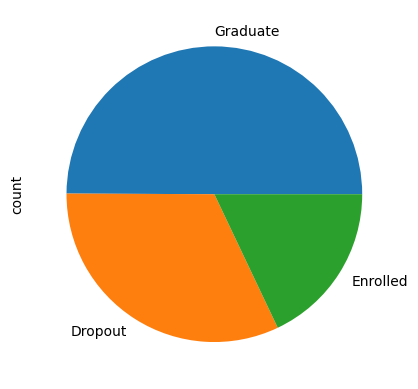

In [4]:
data['Target'].value_counts().plot(kind='pie')

### Correlation Matrix

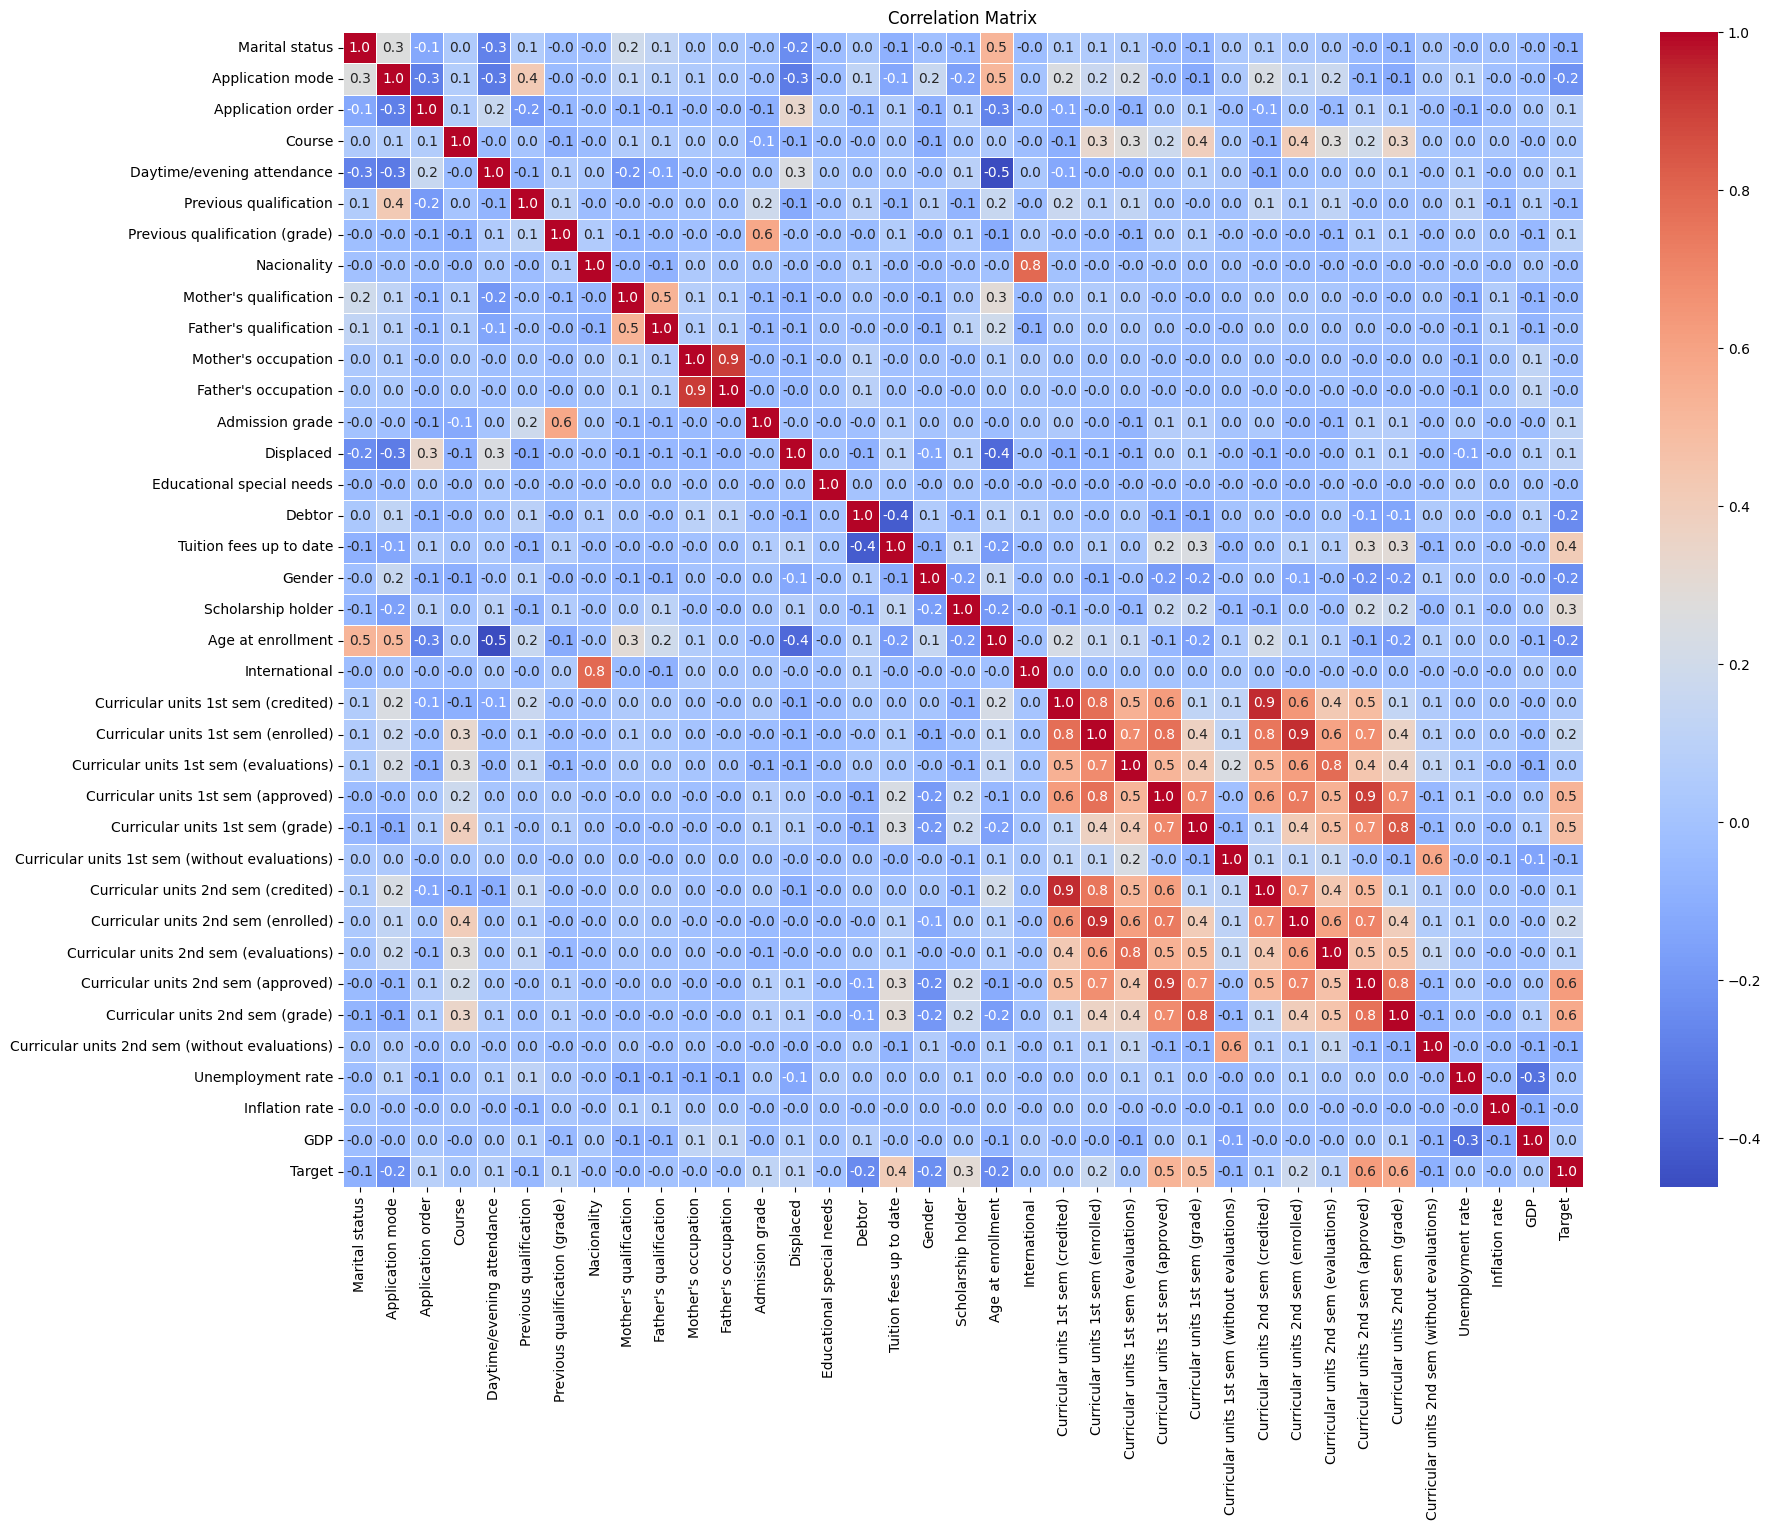

In [5]:
# encoding the target since it is categorical and for correlation we need numerical values
label_encoder = LabelEncoder()
data_with_encoded_target = data.copy()
data_with_encoded_target['Target'] = label_encoder.fit_transform(data['Target'])

correlation_matrix = data_with_encoded_target.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [6]:
highly_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            highly_correlated.append(
                (correlation_matrix.index[i], correlation_matrix.columns[j]))

less_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) <= 0.3:
            less_correlated.append(
                (correlation_matrix.index[i], correlation_matrix.columns[j]))
target_column = 'Target'
correlation_with_target = data_with_encoded_target.corr(
)[target_column].sort_values(ascending=False)
print("Correlation with Target:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(correlation_with_target)

Correlation with Target:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance                        0.075107
Curricular units 2nd sem (credited)               0.05

The correlation analysis reveals several meaningful relationships between input features and the target variable.

**Curricular performance** indicators show the strongest correlations:

- Curricular units 2nd sem (approved) (0.62)

- Curricular units 2nd sem (grade) (0.57)

- Curricular units 1st sem (approved) (0.53)

- Curricular units 1st sem (grade) (0.49)

> These suggest that **academic success** in the *early* semesters is a strong predictor of student outcomes.

**Financial status** indicators also play a notable role:

- Tuition fees up to date (0.41)

- Scholarship holder (0.30)

> Students who are financially stable or receive scholarships are more likely to continue their studies.

Weak or negligible correlations are seen in variables such as:

- Gender (–0.23)

- Age at enrollment (–0.24)

- Application mode (–0.22)

Marital status, Father’s qualification, and Mother’s qualification all show near-zero correlation.

### Tuition Fee correlation

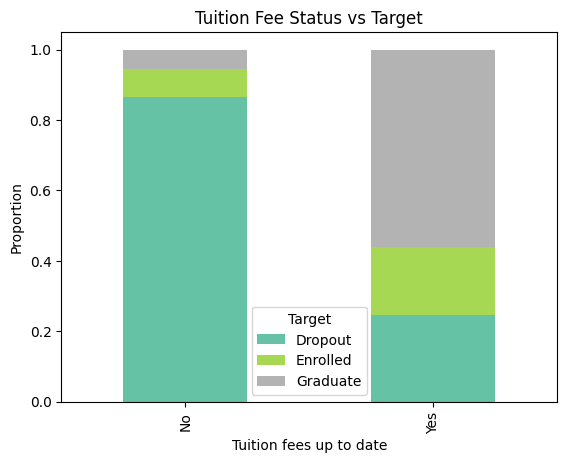

In [7]:
tuition_fee_map = {
    1: 'Yes',
    0: 'No',
}

pd.crosstab(data['Tuition fees up to date'].map(tuition_fee_map), data['Target'],
            normalize='index').plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Tuition Fee Status vs Target')
plt.ylabel('Proportion')
plt.xlabel('Tuition fees up to date')
plt.legend(title='Target')
plt.show()

As we saw in the correlation matrix, financial factors play a meaningful role in predicting student outcomes. The stacked bar plot of "Tuition fees up to date" vs. Target clearly shows this relationship. 

Students who are up to date with their tuition payments are more likely to achieve favorable outcomes, while those with outstanding fees have a higher dropout rate.

This supports the idea that financial stability is an important factor in student success.

### Success Rates by Gender and Outcome

   Gender    Target  count  percentage Gender_label
0       0   Dropout    720   25.104603       Female
1       0  Enrolled    487   16.980474       Female
2       0  Graduate   1661   57.914923       Female
3       1   Dropout    701   45.051414         Male
4       1  Enrolled    307   19.730077         Male
5       1  Graduate    548   35.218509         Male


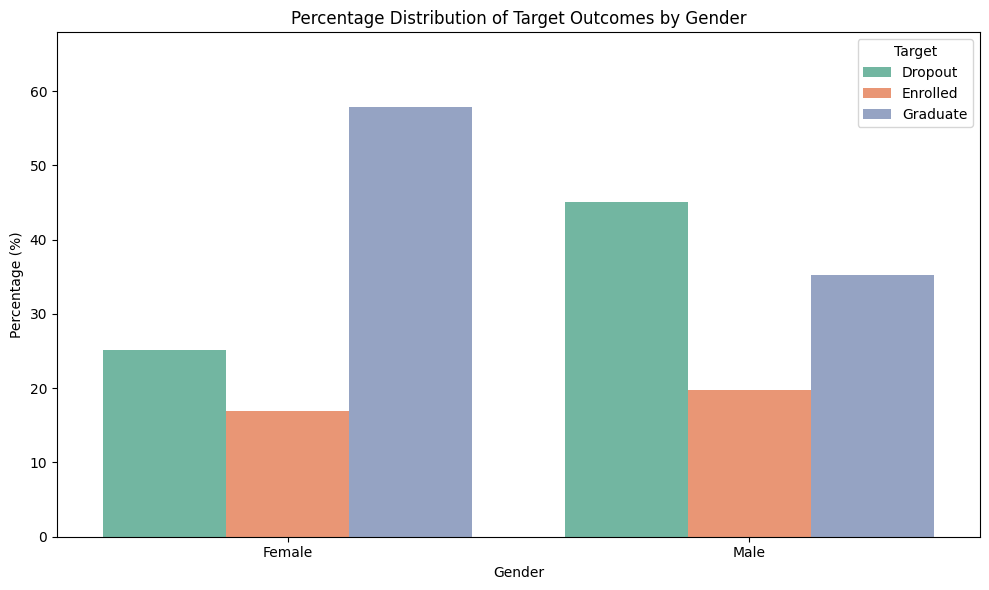

In [8]:

# Calculate counts by Gender and Target without modifying original data
counts = data.groupby(['Gender', 'Target']).size().reset_index(name='count')

# Calculate total per Gender for percentage calculation
totals = counts.groupby('Gender')['count'].transform('sum')
counts['percentage'] = counts['count'] / totals * 100

# Map Gender codes to labels for clarity (adjust if needed)
gender_map = {1: 'Male', 0: 'Female'}
counts['Gender_label'] = counts['Gender'].map(gender_map)
print(counts)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=counts,
    x='Gender_label',
    y='percentage',
    hue='Target',
    palette='Set2'
)

plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.title('Percentage Distribution of Target Outcomes by Gender')
plt.legend(title='Target')
plt.ylim(0, counts['percentage'].max() + 10)
plt.tight_layout()
plt.show()

Female students graduate at a significantly higher rate (58%) than male students (35%), while males have a much higher dropout rate (45% vs. 25%). This stark contrast highlights a gender gap in academic success.

## 4. Data Cleaning (if necessary, otherwise leave empty but justified)

According to the data source, lots of data cleaning and preperation was performed.  
Also they removed any unexplainable outliers.

1. Incorrect values  
   There seems to be no incorrect values 

2. Missing values  
    according to the initial analysis there are no missing values.

3. Justified feature reduction or type conversion  
    There is no need to remove features.

4. Save the - if necessary - merged and integrated files from various sources into `korr.csv`  
    Not necessary - No changes were made.

## 5. Data Preparation
1. Different pipelines per algorithm (SVM, DT, RF, kNN, Logistic Regression) including splitting into train-validation sets with stratification

In [9]:
# Split into train/validation with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=my_random_state, stratify=Y)

In [10]:
# kNN
knn_pipeline = Pipeline(
    steps=[
        ('scaler', RobustScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

In [11]:
# SVM
svm_pipeline = Pipeline(
    steps=[
        ("scaler", RobustScaler()),
        ("svm", SVC(random_state=my_random_state))
    ]
)

In [12]:
# RF
rf_pipeline = Pipeline(
    steps=[
        ('rf', RandomForestClassifier(random_state=my_random_state))
    ]
)

In [13]:
# LogisticRegression
logreg_pipeline = Pipeline(
    steps=[
        ("scaler", RobustScaler()),
        ("logreg", LogisticRegression(random_state=my_random_state))
    ]
)

In [14]:
# DT
dt_pipeline = Pipeline(
    steps=[
        ('dt', DecisionTreeClassifier(random_state=my_random_state))
    ]
)

## 6. Comparison of Classification Algorithms

### 1. Hyperparameter optimization using GridSearch per algorithm with `cv=5` + time < 15 min

#### kNN GridSearch

In [15]:
knn_param_grid = [{'knn__n_neighbors': range(1, 30),
                   'knn__weights': ['uniform', 'distance'],
                   'knn__metric': ['euclidean', 'manhattan'],
                   'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                   'knn__leaf_size': [1, 5, 10, 20, 30, 40, 50]}]

knn_grid_search = GridSearchCV(
    # using accuracy as scoring metric instead of f1_score since f1 didn't work
    estimator=knn_pipeline, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1) 

knn_grid_search.fit(X_train, y_train)

print(knn_grid_search.best_params_)
print(knn_grid_search.best_score_)

{'knn__algorithm': 'ball_tree', 'knn__leaf_size': 1, 'knn__metric': 'manhattan', 'knn__n_neighbors': 21, 'knn__weights': 'uniform'}
0.713825108134869


#### SVM GridSearch

In [16]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
# we use HalvingGridSearchCV for SVM to speed up the search process

svm_param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__degree': [1, 2, 3, 4],
    'svm__coef0': [0.0, 0.1, 0.5, 1]
}

svm_grid_search = HalvingGridSearchCV(svm_pipeline, svm_param_grid,
                                      cv=5, scoring='accuracy', n_jobs=-1) # enable multi-processing with n_jobs=-1

svm_grid_search.fit(X_train, y_train)

print(svm_grid_search.best_params_)
print(svm_grid_search.best_score_)

{'svm__C': 0.1, 'svm__coef0': 0.1, 'svm__degree': 3, 'svm__gamma': 1e-05, 'svm__kernel': 'linear'}
0.7609223197997539


#### Random Forrest GridSearch

In [17]:
rf_param_grid = {
    'rf__n_estimators': [50, 75, 100, 150, 200],
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': range(1, 15),
    'rf__min_samples_leaf': range(1, 10),
    'rf__max_features': ['sqrt', 'log2'],
    'rf__bootstrap': [True, False]
}
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)

{'rf__bootstrap': False, 'rf__criterion': 'entropy', 'rf__max_depth': 11, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__n_estimators': 150}
0.7706753869404346


#### Logistic Regression GridSearch

In [18]:
logreg_param_grid = [
    {
        "logreg__solver": ["liblinear"],
        "logreg__penalty": ["l1", "l2"],
        "logreg__dual": [False],
        "logreg__fit_intercept": [True, False],
        "logreg__max_iter": [5000],
        "logreg__C": [0.01, 0.1, 1, 10, 100],
        "logreg__class_weight": [None, "balanced"]
    },
    {
        "logreg__solver": ["saga"],
        "logreg__penalty": ["l1", "l2"],
        "logreg__dual": [False],
        "logreg__fit_intercept": [True, False],
        "logreg__max_iter": [5000],
        "logreg__C": [0.01, 0.1, 1, 10, 100],
        "logreg__class_weight": [None, "balanced"]
    }
]

logreg_grid_search = GridSearchCV(
    logreg_pipeline, logreg_param_grid, cv=5, scoring='accuracy',  n_jobs=-1)

logreg_grid_search.fit(X_train, y_train)

print(logreg_grid_search.best_params_)
print(logreg_grid_search.best_score_)

/home/itmam/school/dsai/data-science-miniproject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/itmam/school/dsai/data-science-miniproject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/itmam/school/dsai/data-science-miniproject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for 

{'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__dual': False, 'logreg__fit_intercept': True, 'logreg__max_iter': 5000, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
0.7664729793110636


#### Decision Tree GridSearch

In [19]:
dt_param_grid = [{'dt__criterion': ['gini', 'entropy'],
                  'dt__splitter': ['best', 'random'],
                  'dt__max_depth': range(1, 20),
                  'dt__min_samples_leaf': range(1, 20),
                  'dt__max_features': [None, 'sqrt', 'log2'],
                  'dt__min_samples_split': [2, 5, 10]}]

dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1)

dt_grid_search.fit(X_train, y_train)

print(dt_grid_search.best_params_)
print(dt_grid_search.best_score_)

{'dt__criterion': 'gini', 'dt__max_depth': 8, 'dt__max_features': None, 'dt__min_samples_leaf': 12, 'dt__min_samples_split': 2, 'dt__splitter': 'random'}
0.751942258585648


### 2. Discussion of the optimized final models

In [20]:
models = {
    'KNN': knn_grid_search,
    'SVM': svm_grid_search,
    'RF': rf_grid_search,
    'Logistic Regression': logreg_grid_search,
    'Decision Tree': dt_grid_search
}

#### Decision surface

KNN {'algorithm': 'ball_tree', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'} KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='manhattan',
                     n_neighbors=21)
Pipeline(steps=[('clf',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=1,
                                      metric='manhattan', n_neighbors=21))])
Decision Tree {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'random'} DecisionTreeClassifier(max_depth=8, min_samples_leaf=12, splitter='random')
Pipeline(steps=[('clf',
                 DecisionTreeClassifier(max_depth=8, min_samples_leaf=12,
                                        splitter='random'))])
Random Forest {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 150} RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=11,
 

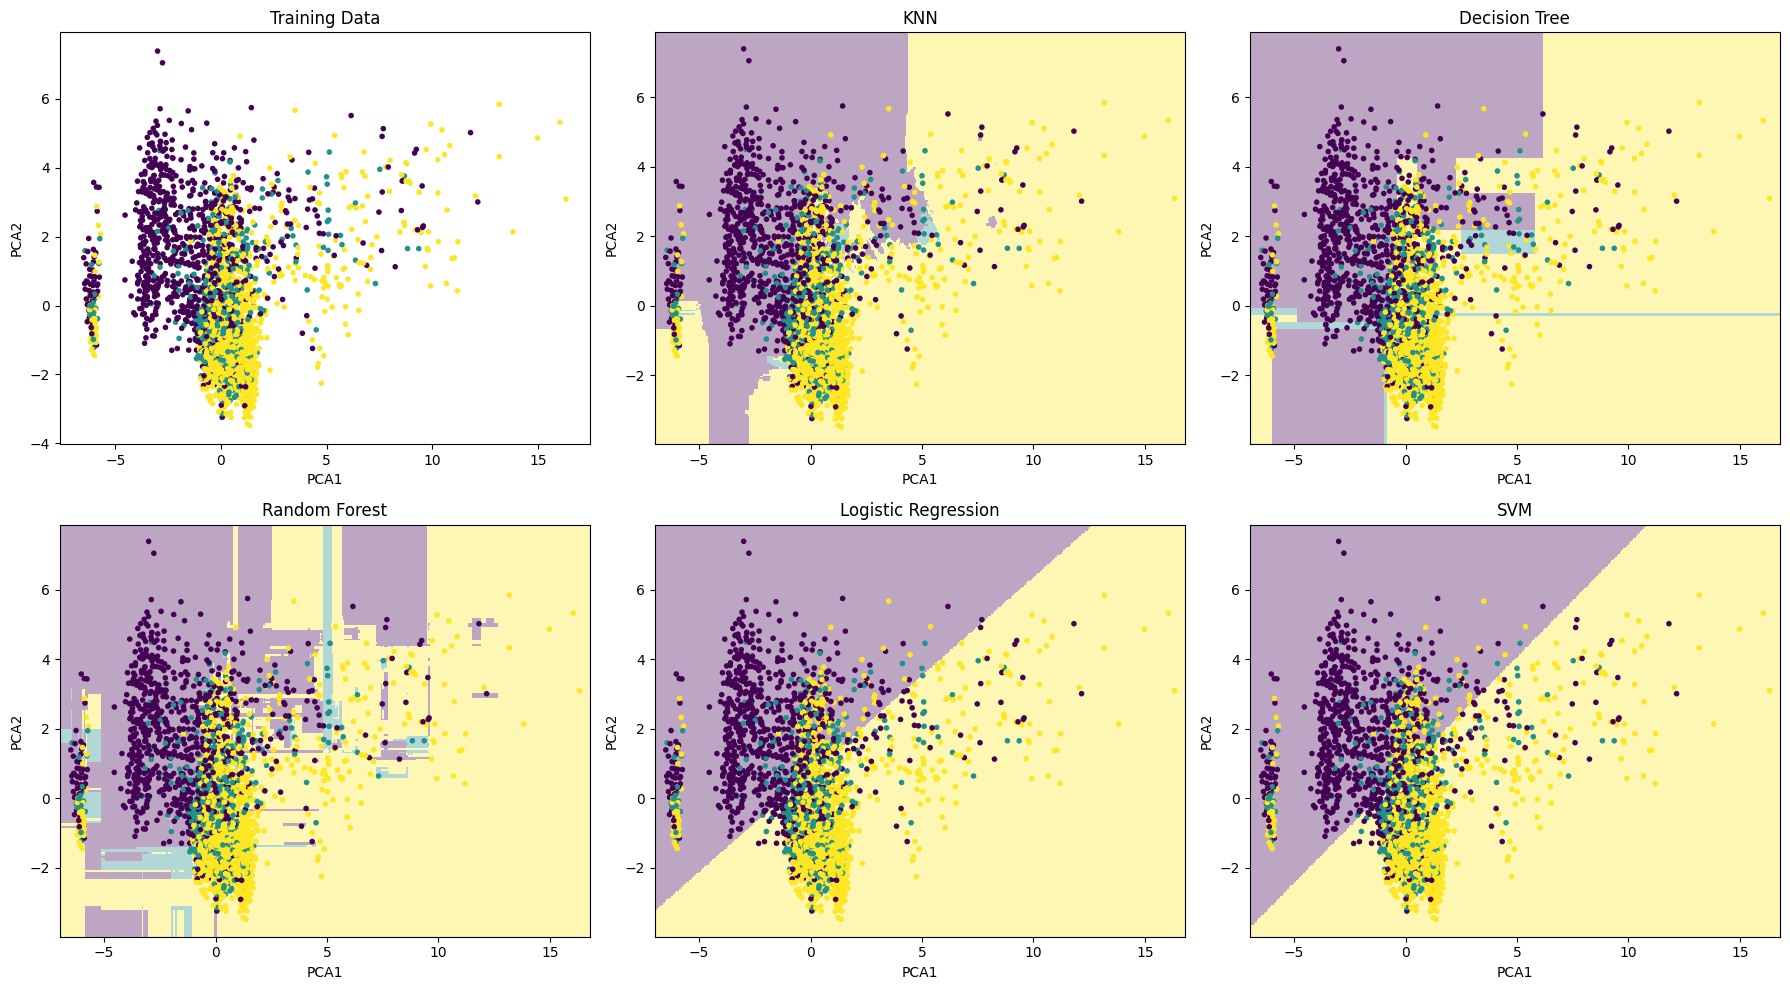

In [21]:


# --- Plot decision surface without altering the model ---
def plot_decision_surface(model, X, Y, ax=None, title=None):
    h = .05
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Convert mesh to DataFrame with same column names
    X_mesh = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
    Z = model.predict(X_mesh).reshape(xx.shape)

    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.pcolormesh(xx, yy, Z, alpha=0.35, shading='auto')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, marker='.')

    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_title(title if title else str(model))


# --- Encode target labels ---
le = LabelEncoder()
Y_encoded = le.fit_transform(y_train)

# --- Reduce features to 2D with PCA (once for plotting only) ---
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
X_2d_array = pca_pipeline.fit_transform(X_train)
X_2d = pd.DataFrame(X_2d_array, columns=['PCA1', 'PCA2'])

# --- Extract best parameter sets from GridSearchCV results (do NOT reuse models) ---
model_specs = [
    ("KNN", KNeighborsClassifier, knn_grid_search.best_params_),
    ("Decision Tree", DecisionTreeClassifier, dt_grid_search.best_params_),
    ("Random Forest", RandomForestClassifier, rf_grid_search.best_params_),
    ("Logistic Regression", LogisticRegression, logreg_grid_search.best_params_),
    ("SVM", SVC, svm_grid_search.best_params_)
]

# --- Create cloned estimators for PCA-transformed plotting only ---
plotting_models = []
for name, cls, best_params in model_specs:
    # Strip prefixes like 'clf__' or 'dt__' from param grid keys
    clean_params = {k.split('__')[-1]: v for k, v in best_params.items()}
    estimator = cls(**clean_params)
    # Clone the PCA pipeline and append classifier
    plot_pipeline = Pipeline([
        ('clf', estimator)
    ])
    print(name, clean_params, estimator)
    # Fit on the original full dataset, but only for the PCA visualization
    plot_pipeline.fit(X_2d, Y_encoded)
    print(plot_pipeline)
    plotting_models.append((name, plot_pipeline))


# --- Plotting ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# First plot: data
axes[0].scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=Y_encoded, marker='.')
axes[0].set_title("Training Data")
axes[0].set_xlabel("PCA1")
axes[0].set_ylabel("PCA2")

# Remaining plots
for i, (name, model) in enumerate(plotting_models, start=1):
    # Reuse transformed PCA data for input; model includes PCA inside too
    plot_decision_surface(model, X_2d, Y_encoded, ax=axes[i], title=name)

# Hide unused axes
for j in range(len(plotting_models) + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Performance comparison table on validation data (Accuracy, F1, Precision, Recall, MCC)

In [22]:
# Metrics storage
results = []

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred, average='weighted'),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "MCC": matthews_corrcoef(y_test, y_pred)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).set_index("Model")
results_df = results_df.round(4)

# Display table
results_df

,Accuracy,F1,Precision,Recall,MCC
Model,,,,,
KNN,0.7078,0.6798,0.6932,0.7078,0.5130
SVM,0.7741,0.7641,0.7699,0.7741,0.6271
RF,0.7922,0.7787,0.7817,0.7922,0.6558
Logistic Regression,0.7613,0.7457,0.7440,0.7613,0.6028
Decision Tree,0.7274,0.7204,0.7200,0.7274,0.5488


Looking at the table, we can conclude that the **Random Forest (RF)** model performs the best overall.

Achieving the highest values across most evaluation metrics—**accuracy (0.7922), F1 score (0.7787), precision (0.7817), recall (0.7922), and MCC (0.6558)**. This suggests that RF is the most reliable and balanced model for this classification task, effectively managing both false positives and false negatives compared to the others.


The **K-Nearest Neighbors (KNN)** model performs the poorest overall.

 It has the **lowest scores in all key metrics**—accuracy (0.7078), F1 score (0.6798), precision (0.6932), recall (0.7078), and especially **MCC (0.5130)**, which indicates weaker overall predictive power and less balanced performance compared to the other models.
